In [3]:
kg1 = {
  "nodes": [
    {
      "id": "Person_1",
      "title": "Augusta Ada King, Countess of Lovelace",
      "description": "English mathematician and writer, considered the first computer programmer.",
      "type": "Person",
      "label": "Ada Lovelace"
    },
    {
      "id": "Person_2",
      "title": "Charles Babbage",
      "description": "English mathematician and mechanical engineer, designer of the Analytical Engine.",
      "type": "Person",
      "label": "Charles Babbage"
    },
    {
      "id": "Person_3",
      "title": "Luigi Federico Menabrea",
      "description": "Italian engineer and later Prime Minister of Italy; author of early paper on the Analytical Engine.",
      "type": "Person",
      "label": "Luigi Federico Menabrea"
    },
    {
      "id": "Organization_1",
      "title": "Analytical Engine",
      "description": "Mechanical general-purpose computer designed by Charles Babbage.",
      "type": "Concept",
      "label": "Analytical Engine"
    },
    {
      "id": "Method_1",
      "title": "Note G Algorithm",
      "description": "Algorithm for computing Bernoulli numbers, possibly first computer program.",
      "type": "Method",
      "label": "Note G"
    },
    {
      "id": "Dataset_1",
      "title": "Bernoulli numbers",
      "description": "Sequence of rational numbers important in number theory and analysis.",
      "type": "Dataset",
      "label": "Bernoulli numbers"
    },
    {
      "id": "Work_1",
      "title": "Translation and Notes on Menabrea's paper",
      "description": "Ada Lovelace’s annotated translation of Menabrea's 1842 article on the Analytical Engine.",
      "type": "Work",
      "label": "Lovelace’s Notes (1843)"
    },
    {
      "id": "Organization_2",
      "title": "Ada (programming language)",
      "description": "Programming language named in honor of Ada Lovelace, standardized by U.S. DoD.",
      "type": "Product/Tool",
      "label": "Ada (language)"
    },
  ],
  "edges": [
    {
      "id": "Edge_1",
      "label": "collaborated_with",
      "source": "Person_1",
      "target": "Person_2"
    },
    {
      "id": "Edge_2",
      "label": "designed_by",
      "source": "Organization_1",
      "target": "Person_2"
    },
    {
      "id": "Edge_3",
      "label": "translated_and_annotated",
      "source": "Person_1",
      "target": "Work_1"
    },
    {
      "id": "Edge_4",
      "label": "authored",
      "source": "Person_3",
      "target": "Work_1"
    },
  ]
}

kg2 = {
  "nodes": [
    {
      "id": "Person_4",
      "title": "Alan Mathison Turing",
      "description": "British mathematician and logician, considered the father of theoretical computer science and artificial intelligence.",
      "type": "Person",
      "label": "Alan Turing"
    },
    {
      "id": "Person_5",
      "title": "Alonzo Church",
      "description": "American mathematician and logician who developed the lambda calculus.",
      "type": "Person",
      "label": "Alonzo Church"
    },
    {
      "id": "Concept_1",
      "title": "Turing Machine",
      "description": "A theoretical device that manipulates symbols on a strip of tape according to a set of rules.",
      "type": "Concept",
      "label": "Turing Machine"
    },
    {
      "id": "Concept_2",
      "title": "Lambda Calculus",
      "description": "A formal system in mathematical logic and computer science for expressing computation.",
      "type": "Concept",
      "label": "Lambda Calculus"
    },
    {
      "id": "Work_2",
      "title": "On Computable Numbers, with an Application to the Entscheidungsproblem",
      "description": "Seminal paper by Alan Turing which introduced the concept of a universal machine.",
      "type": "Work",
      "label": "Computable Numbers (1936)"
    },
    {
      "id": "Work_3",
      "title": "An Unsolvable Problem of Elementary Number Theory",
      "description": "A paper by Alonzo Church demonstrating a problem that cannot be solved algorithmically.",
      "type": "Work",
      "label": "Church’s Paper (1936)"
    },
    {
      "id": "Dataset_2",
      "title": "Church-Turing Thesis",
      "description": "A hypothesis about the nature of computable functions in mathematics.",
      "type": "Dataset",
      "label": "Church-Turing Thesis"
    },
    {
      "id": "Tool_1",
      "title": "Universal Turing Machine Simulator",
      "description": "A modern software tool simulating Turing’s theoretical machine.",
      "type": "Product/Tool",
      "label": "UTM Simulator"
    }
  ],
  "edges": [
    {
      "id": "Edge_5",
      "label": "inspired_by",
      "source": "Person_4",
      "target": "Person_5"
    },
    {
      "id": "Edge_6",
      "label": "proposed",
      "source": "Person_4",
      "target": "Concept_1"
    },
    {
      "id": "Edge_7",
      "label": "proposed",
      "source": "Person_5",
      "target": "Concept_2"
    },
    {
      "id": "Edge_8",
      "label": "authored",
      "source": "Person_4",
      "target": "Work_2"
    },
    {
      "id": "Edge_9",
      "label": "authored",
      "source": "Person_5",
      "target": "Work_3"
    },
    {
      "id": "Edge_10",
      "label": "foundation_of",
      "source": "Concept_1",
      "target": "Dataset_2"
    },
    {
      "id": "Edge_11",
      "label": "foundation_of",
      "source": "Concept_2",
      "target": "Dataset_2"
    },
    {
      "id": "Edge_12",
      "label": "inspired",
      "source": "Dataset_2",
      "target": "Tool_1"
    }
  ]
}

In [4]:
import matplotlib.pyplot as plt
import networkx as nx

In [5]:
def visualize_kg(kg):
    G = nx.DiGraph()
    for node in kg['nodes']:
        G.add_node(node['id'], label=node.get('label', node['id']), type=node.get('type', 'Unknown'))

    for edge in kg['edges']:
        G.add_edge(edge['source'], edge['target'], label=edge['label'])

    pos = nx.spring_layout(G, seed=42)
    plt.figure(figsize=(12, 8))

    color_map = []
    for node in G.nodes(data=True):
        t = node[1].get('type', 'Unknown')
        color_map.append('skyblue' if t == 'Person' else 'lightgreen' if t == 'Organization' else 'orange')

    nx.draw_networkx_nodes(G, pos, node_color=color_map, node_size=700)
    nx.draw_networkx_labels(G, pos, labels={n: d.get('label', n) for n, d in G.nodes(data=True)})
    nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=20)

    edge_labels = {(e['source'], e['target']): e['label'] for e in kg['edges']}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    plt.title("Merged Knowledge Graph Visualization")
    plt.axis('off')
    plt.show()

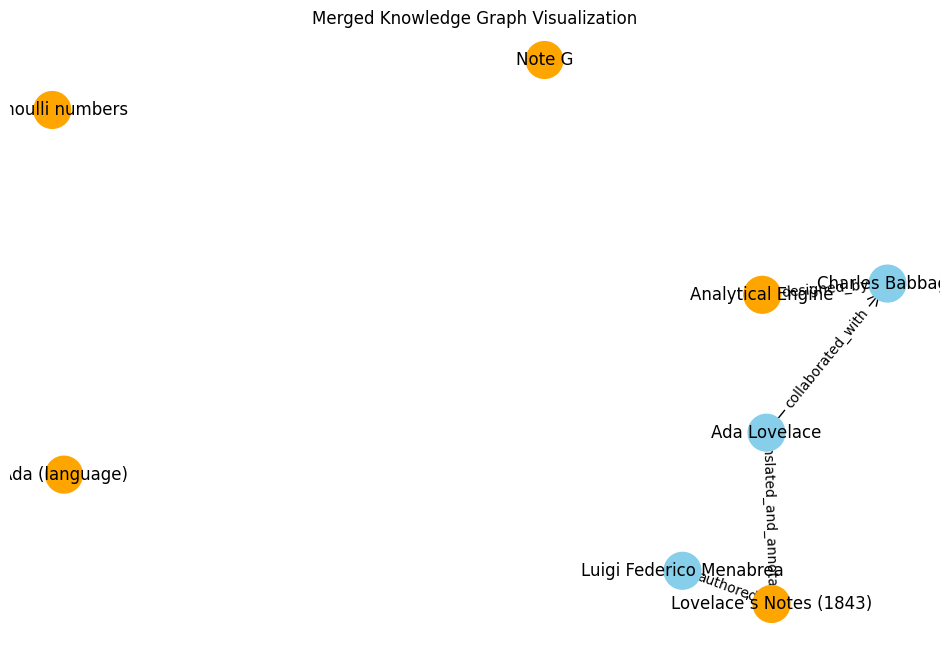

In [6]:
visualize_kg(kg1)

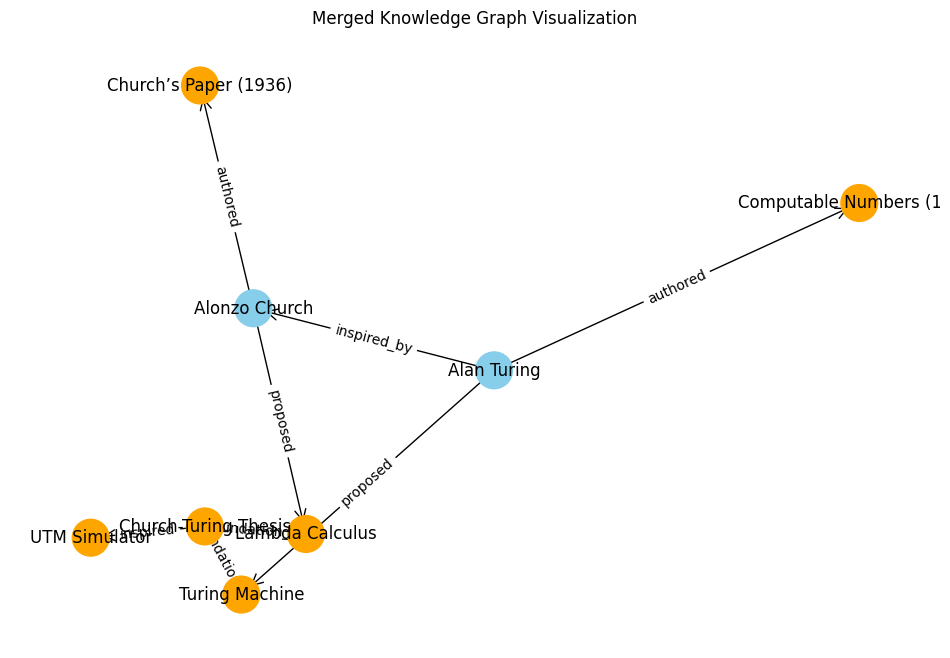

In [7]:
visualize_kg(kg2)

In [8]:
from api.agentic.core.graph.schemas import ExtractedGraph
from api.document.schemas import DocumentEdgeBase, DocumentNodeBase

kg1_graph = ExtractedGraph(
    nodes=[DocumentNodeBase(**n) for n in kg1["nodes"]],
    edges=[DocumentEdgeBase(
        label=e["label"],
        source=e["source"],
        target=e["target"]
    ) for e in kg1["edges"]]
)

kg2_graph = ExtractedGraph(
    nodes=[DocumentNodeBase(**n) for n in kg2["nodes"]],
    edges=[DocumentEdgeBase(
        label=e["label"],
        source=e["source"],
        target=e["target"]
    ) for e in kg2["edges"]]
)

print(kg1_graph.model_dump())
print(kg2_graph.model_dump())

{'nodes': [{'id': 'Person_1', 'title': 'Augusta Ada King, Countess of Lovelace', 'description': 'English mathematician and writer, considered the first computer programmer.', 'type': 'Person', 'label': 'Ada Lovelace'}, {'id': 'Person_2', 'title': 'Charles Babbage', 'description': 'English mathematician and mechanical engineer, designer of the Analytical Engine.', 'type': 'Person', 'label': 'Charles Babbage'}, {'id': 'Person_3', 'title': 'Luigi Federico Menabrea', 'description': 'Italian engineer and later Prime Minister of Italy; author of early paper on the Analytical Engine.', 'type': 'Person', 'label': 'Luigi Federico Menabrea'}, {'id': 'Organization_1', 'title': 'Analytical Engine', 'description': 'Mechanical general-purpose computer designed by Charles Babbage.', 'type': 'Concept', 'label': 'Analytical Engine'}, {'id': 'Method_1', 'title': 'Note G Algorithm', 'description': 'Algorithm for computing Bernoulli numbers, possibly first computer program.', 'type': 'Method', 'label': 'N

In [9]:
from api.agentic.dependencies import get_knowledge_graph_merger, get_text_embedder

merger = get_knowledge_graph_merger(get_text_embedder())
threshold = 0.65  # Example threshold for similarity
kgs = [kg1_graph, kg2_graph]

2025-08-09 16:22:04.164 | INFO     | api.agentic.core.embedding.embedding:_load_model:43 - Loading embedding model: FlukeTJ/bge-m3-m2v-distilled-256 using backend: model2vec


2025-08-09 16:22:08.472 | INFO     | api.agentic.core.embedding.embedding:_load_model:58 - Embedding model loaded successfully.


In [10]:
label_to_id, id_to_data = merger._extract_label_maps(kgs)
canonical_map = merger._build_canonical_map(label_to_id, threshold=threshold)

canonical_map

100%|██████████| 1/1 [00:00<00:00, 1030.79it/s]


{'Ada Lovelace': 'Ada Lovelace',
 'Charles Babbage': 'Charles Babbage',
 'Luigi Federico Menabrea': 'Luigi Federico Menabrea',
 'Analytical Engine': 'Analytical Engine',
 'Note G': 'Note G',
 'Bernoulli numbers': 'Bernoulli numbers',
 'Lovelace’s Notes (1843)': 'Lovelace’s Notes (1843)',
 'Ada (language)': 'Ada (language)',
 'Alan Turing': 'Alan Turing',
 'Alonzo Church': 'Alonzo Church',
 'Turing Machine': 'Turing Machine',
 'Lambda Calculus': 'Lambda Calculus',
 'Computable Numbers (1936)': 'Computable Numbers (1936)',
 'Church’s Paper (1936)': 'Church’s Paper (1936)',
 'Church-Turing Thesis': 'Church-Turing Thesis',
 'UTM Simulator': 'UTM Simulator'}

In [11]:
merged_kg = merger._merge_kgs(kgs, canonical_map, label_to_id, id_to_data)

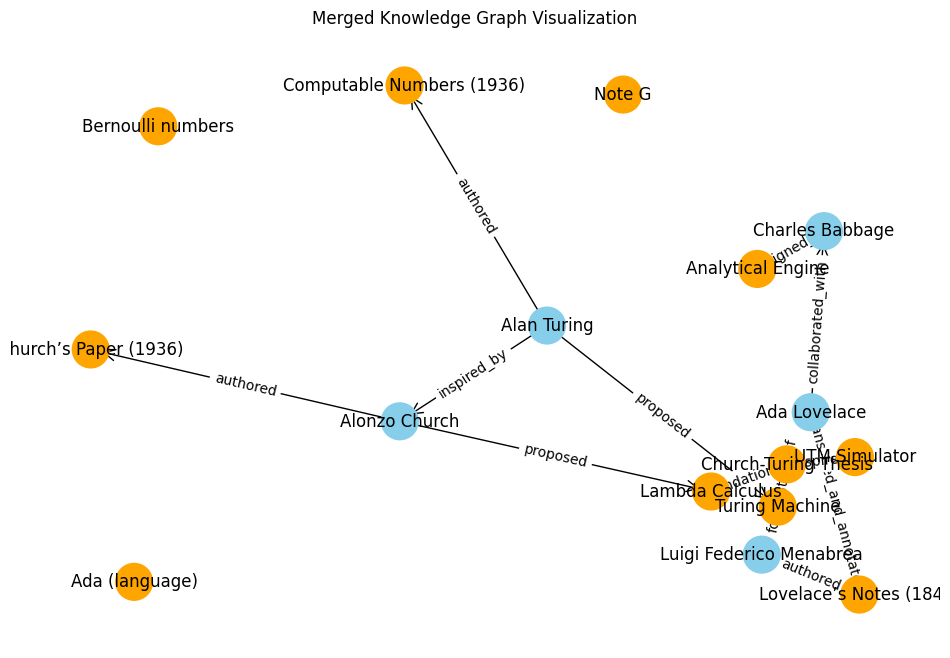

In [12]:
visualize_kg(merged_kg.model_dump())